In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [495]:
#Read the csv file using pandas
bike_df = pd.read_csv('day.csv')

In [496]:
#Inspect first few rows
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [497]:
#check the shape
bike_df.shape

(730, 16)

In [498]:
#column names of the data frame
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [499]:
#check Data tpyes of column
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [500]:
#check null columns in dataframes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [501]:
#check for null values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [502]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Observation of Data

1. The data frame has 730 rows and 16 columns
2. Except 'dteday' whose dtype is object (Date data-type), all other are either float or integer type.
3. There are no null values in the data frame.
4. Some columns are irrelevant and can be dropped.

### Dropping irrelevant  columns

In [503]:
# instant column contains index values only, not requried
bike_df.drop(['instant'],axis=1,inplace=True)

In [504]:
# we already have year , month and weekday columns, so dteday in not required
bike_df.drop(['dteday'],axis=1,inplace=True)

In [505]:
# we are not intreseted in casual and registered users we only need the total count for target variable
# As casual+registered gives us total count we can drop these col.
bike_df.drop(['casual','registered'],axis=1,inplace=True)

In [506]:
# checking of the dataset
bike_df.shape

(730, 12)

In [507]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Converting columns to categorical type

In [508]:
#converting Season column values to corresponding category given in Data dictonary. 
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)


In [509]:
#converting wheather column values to corresponding category given in Data dictonary. 
bike_df.weathersit.replace({1:'clear',2:'cloudy',3:'light',4:'heavy'},inplace = True)


In [510]:
#converting month column values to corresponding category given in Data dictonary.
bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [511]:
#converting weekday column values to corresponding category given in Data dictonary.
bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [512]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Data visualization


#### plotting categorical variables against target variable(cnt)

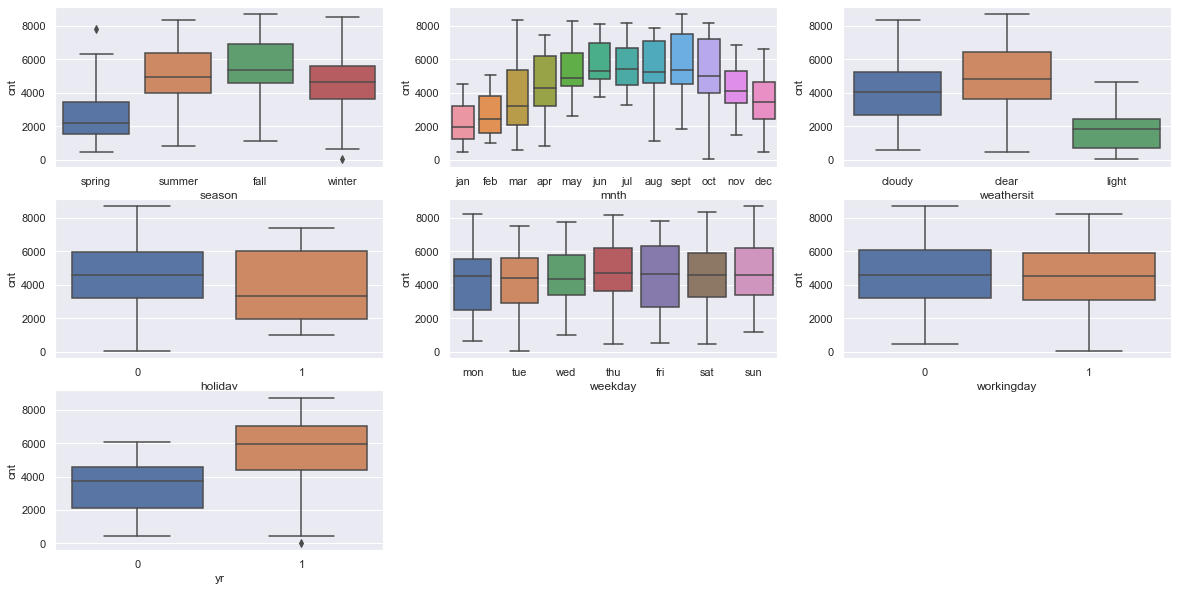

In [513]:
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

#### Pairplot of numerical variables

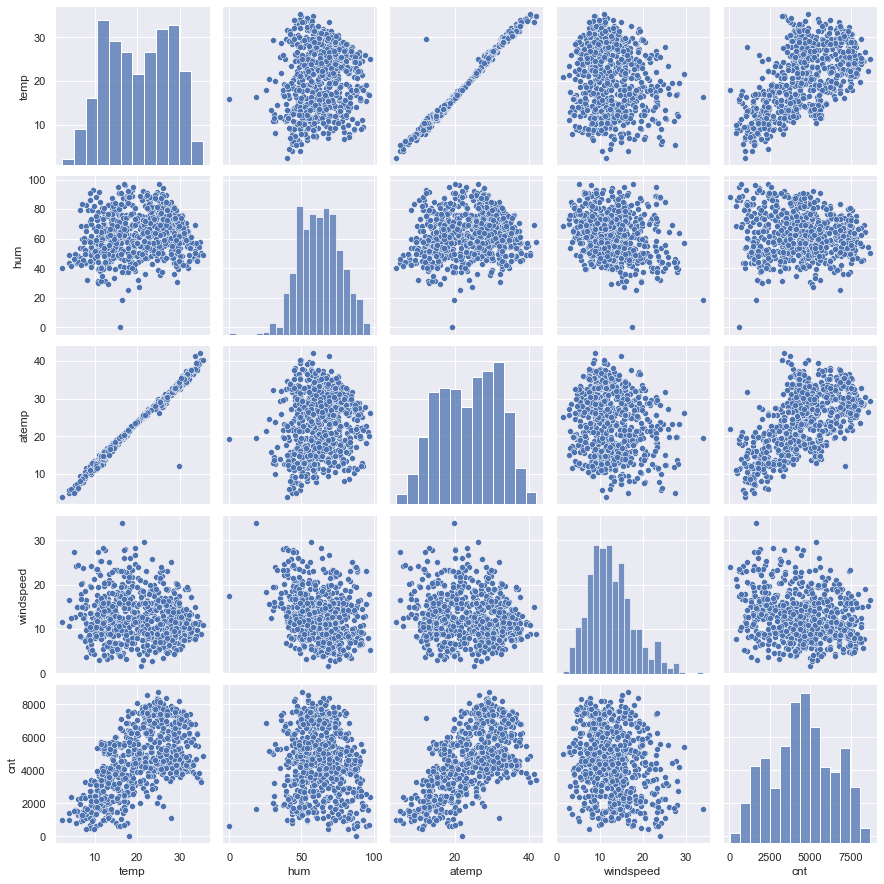

In [514]:
sns.pairplot(bike_df, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

####  Heatmap correlation for numerical variables in data frame

In [515]:
bike_df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


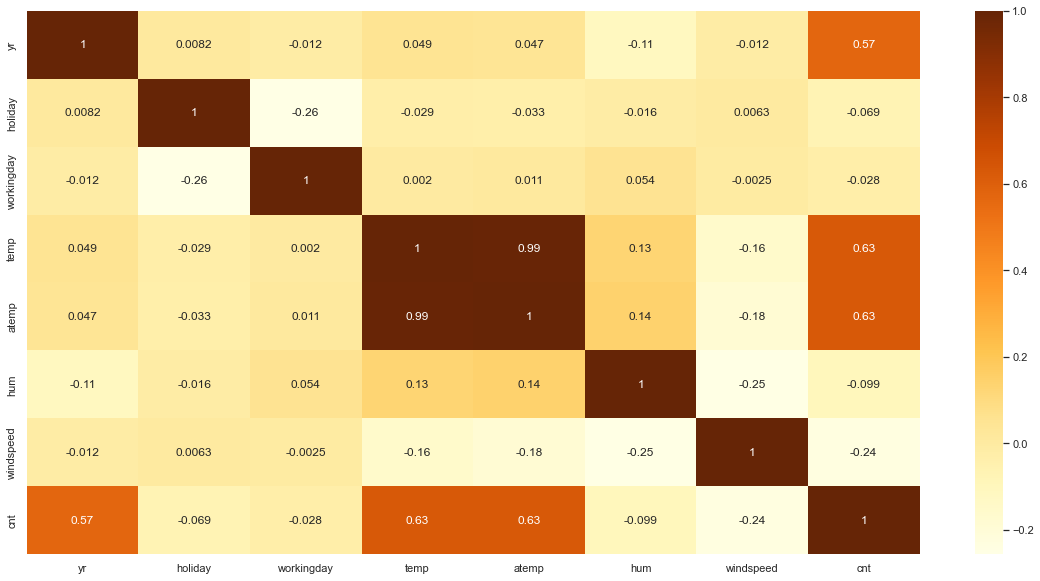

In [516]:

plt.figure(figsize=(20,10))

#Draw Heatmap of correlation
sns.heatmap(bike_df.corr(),annot=True, cmap='YlOrBr' )
plt.show()

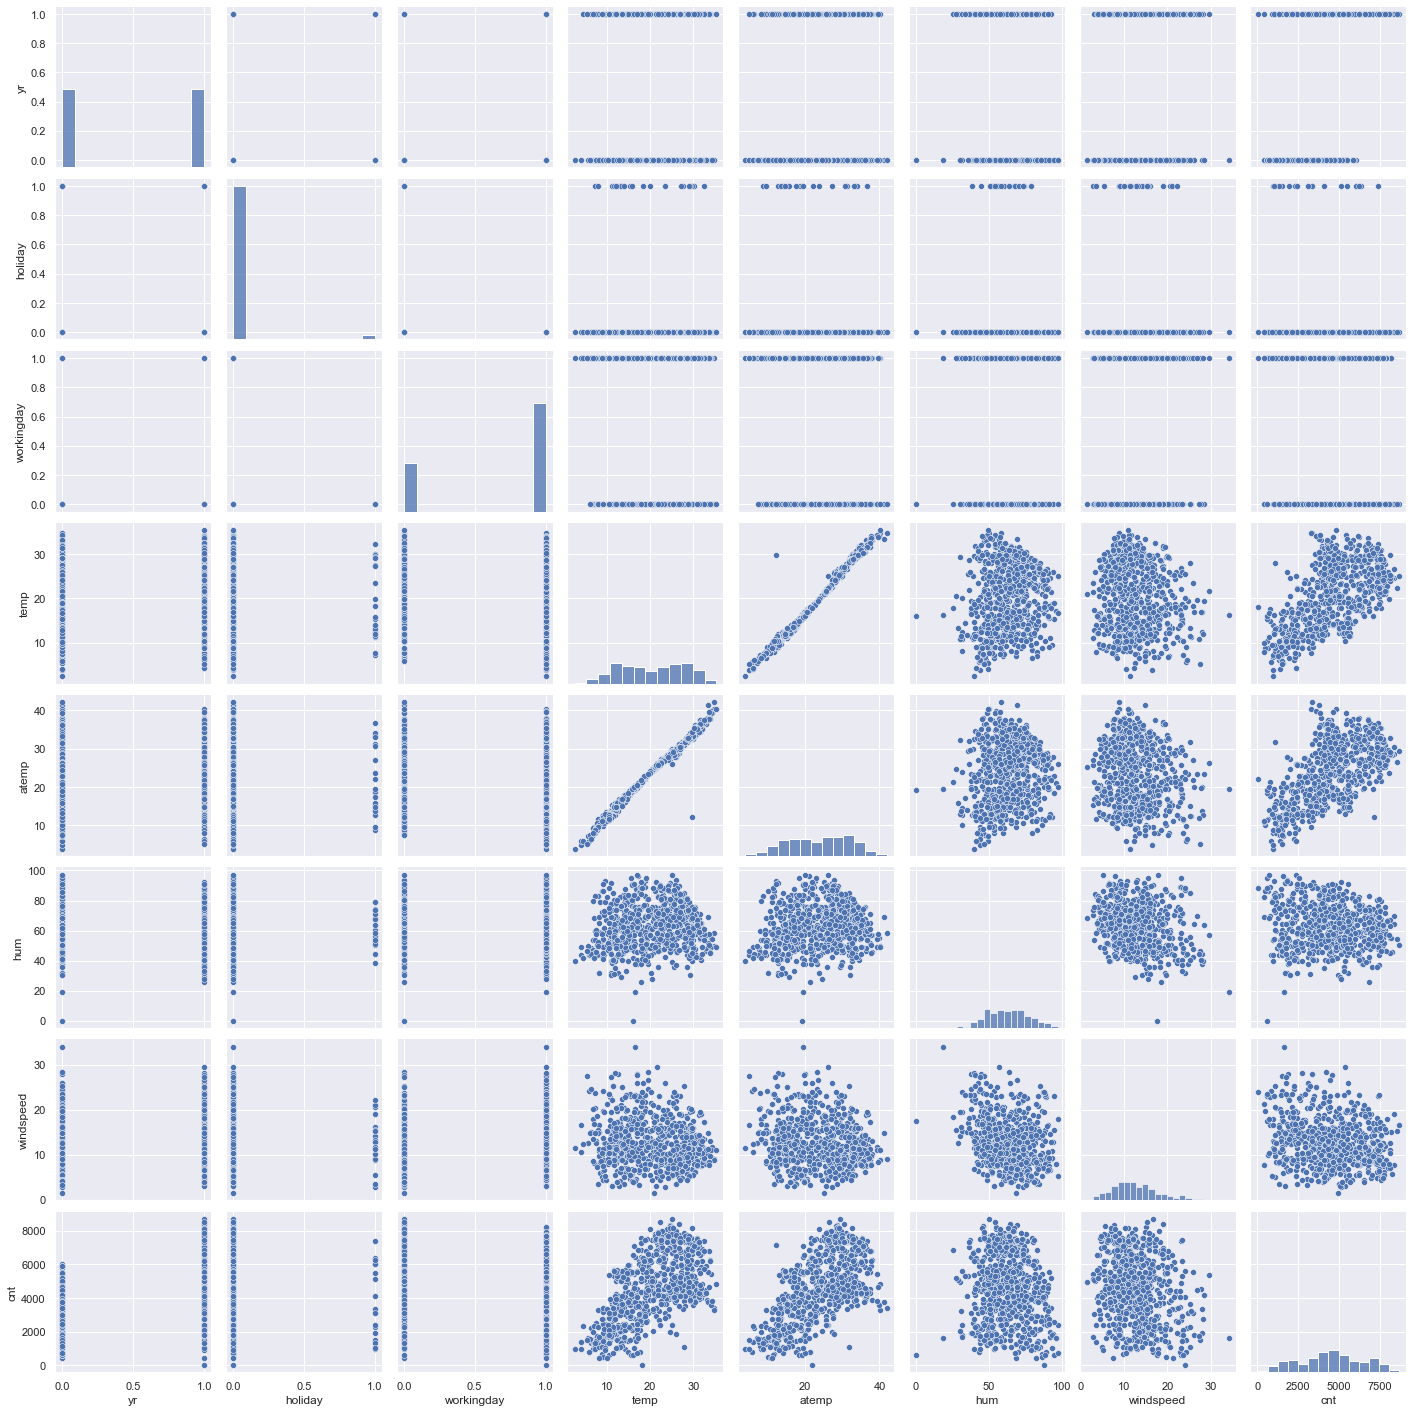

In [517]:
sns.pairplot(bike_df)

### Insights from data visualtization
- When there is a holiday, demand has decreased.
- Season - fall has highest demand for rental bikes
- The clear weather has highest demand.
- Demand is continuously growing each month till June.
- September month has highest demand. Demand is deceasing after september
- Temp and atemp are highly correlated
- Temp and Atemp also have high correlation with cnt variable.
- we can observe cnt decreasing with increase in humidity.
- we can observe cnt decreasing with increase in windspeed.

### Data preparation for Model

In [518]:
# Dummy variable creation for month, weekday, weathersit and season variables.
months_df=pd.get_dummies(bike_df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weather_df=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_df.season,drop_first=True)

In [519]:
# Merging  the dataframe, with the dummy variable dataset. 

df = pd.concat([bike_df,months_df,weekdays_df,weather_df,seasons_df],axis=1)

In [520]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,cloudy,light,spring,summer,winter
0,spring,0,jan,0,mon,1,cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,1,0,0
1,spring,0,jan,0,tue,1,cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,1,0,1,0,0
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    uint8  
 13  dec         730 non-null    uint8  
 14  feb         730 non-null    uint8  
 15  jan         730 non-null    uint8  
 16  jul         730 non-null    uint8  
 17  jun         730 non-null    uint8  
 18  mar         730 non-null    uint8  
 19  may         730 non-null    u

In [522]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   aug         730 non-null    uint8  
 9   dec         730 non-null    uint8  
 10  feb         730 non-null    uint8  
 11  jan         730 non-null    uint8  
 12  jul         730 non-null    uint8  
 13  jun         730 non-null    uint8  
 14  mar         730 non-null    uint8  
 15  may         730 non-null    uint8  
 16  nov         730 non-null    uint8  
 17  oct         730 non-null    uint8  
 18  sept        730 non-null    uint8  
 19  mon         730 non-null    u

### Data Splitting

#### Here, we will split the data into 2 parts
- Train Data (On which model will be build and will consist 70% of total data)
- Test Data (On which build model will be tested and will consist 30% of total data)

In [524]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [525]:
df_train.shape

(510, 30)

In [526]:
df_test.shape

(220, 30)

In [527]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

### Scaling numerical variables so they can be normalized

In [528]:
num_var = ['temp','atemp', 'hum', 'windspeed', 'cnt']

In [529]:
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,cloudy,light,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,1,0,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,1,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,1,0,0,1,0
580,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559,1,0,...,0,1,0,0,0,0,0,0,0,0
500,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588,0,0,...,0,0,1,0,0,0,0,0,1,0
479,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308,0,0,...,0,0,1,0,0,0,0,0,1,0
472,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885,0,0,...,0,0,1,0,0,1,0,0,1,0
455,1,0,1,0.456929,0.443956,0.696865,0.279394,0.692476,0,0,...,0,0,0,0,0,1,0,0,1,0


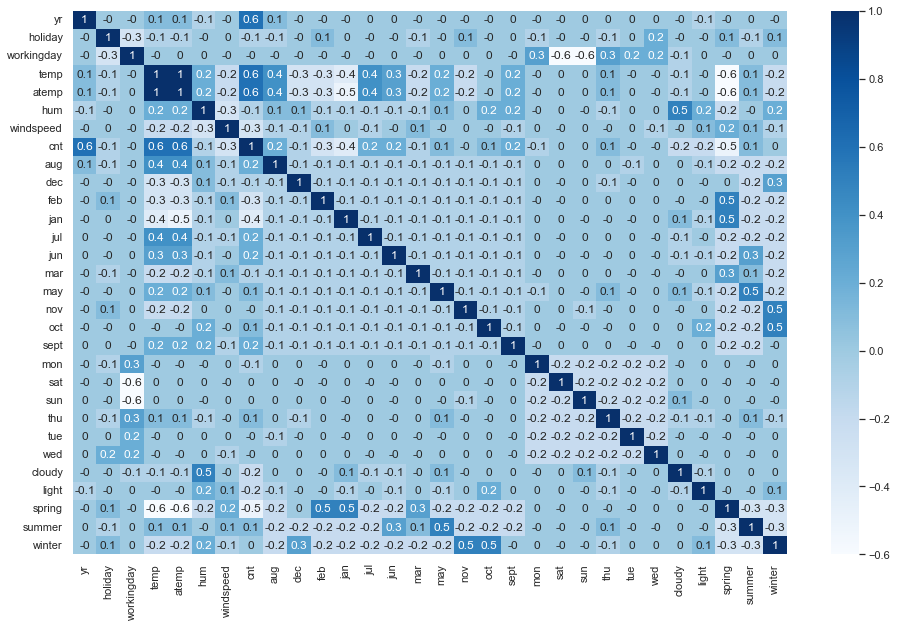

In [530]:
#Checking corelation of df
plt.figure(figsize=(16, 10))
df_train.corr()
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='Blues')
plt.show()

#### Insights
- Cnt column has high correlation with temp and atemp and year 
- Cloudy has high correlation humidity
- Spring has high correlation with feb and jan
- Winter has high corelation with oct and nov

### Linear Model building

In [531]:
# Fixing Trained Target Variable
y_train = df_train.pop('cnt')

In [532]:
# Fixing Trained Feature(s) Variable
X_train = df_train

In [533]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   aug         510 non-null    uint8  
 8   dec         510 non-null    uint8  
 9   feb         510 non-null    uint8  
 10  jan         510 non-null    uint8  
 11  jul         510 non-null    uint8  
 12  jun         510 non-null    uint8  
 13  mar         510 non-null    uint8  
 14  may         510 non-null    uint8  
 15  nov         510 non-null    uint8  
 16  oct         510 non-null    uint8  
 17  sept        510 non-null    uint8  
 18  mon         510 non-null    uint8  
 19  sat         510 non-null   

#### Currently, we have almost 30 Predictors to Predict our outcome. Analysing these many predictors can be very hectic.
#### To simplify this process, we will use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an order of importance (of impacting outcome)

In [534]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [535]:
rfe_df = pd.DataFrame({'Col Name': X_train.columns, 'Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Col Name,Status,Ranking
0,yr,True,1
26,spring,True,1
25,light,True,1
24,cloudy,True,1
17,sept,True,1
15,nov,True,1
27,summer,True,1
11,jul,True,1
10,jan,True,1
28,winter,True,1


In [536]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [537]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'jul', 'nov',
       'sept', 'cloudy', 'light', 'spring', 'summer', 'winter'],
      dtype='object')


In [538]:
df_rfe = X_train[col]
df_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         510 non-null    int64  
 1   holiday    510 non-null    int64  
 2   temp       510 non-null    float64
 3   hum        510 non-null    float64
 4   windspeed  510 non-null    float64
 5   dec        510 non-null    uint8  
 6   jan        510 non-null    uint8  
 7   jul        510 non-null    uint8  
 8   nov        510 non-null    uint8  
 9   sept       510 non-null    uint8  
 10  cloudy     510 non-null    uint8  
 11  light      510 non-null    uint8  
 12  spring     510 non-null    uint8  
 13  summer     510 non-null    uint8  
 14  winter     510 non-null    uint8  
dtypes: float64(3), int64(2), uint8(10)
memory usage: 28.9 KB


In [539]:
# Generic function to calculate VIF of variables

def fetch_vif(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

#### Model Building  - 1

In [540]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          8.15e-189
Time:                        23:08:19   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
jul           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sept           0.0755      0.017      4.466      0.000       0.042       0.109
cloudy        -0.0543      0.010     -5.194      0.000      -0.075      -0.034
light         -0.2465      0.026     -9.331      0.000      -0.298      -0.195
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [541]:
fetch_vif(X_train_rfe)

,Features,VIF
0,hum,30.89
1,temp,17.79
2,windspeed,4.72
3,spring,4.37
4,winter,4.06
5,summer,2.82
6,cloudy,2.32
7,yr,2.09
8,nov,1.85
9,jan,1.75


In [542]:
# As humidity shows high VIF values hence we can drop it
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)


#### Model Building - 2
- After dropping humidity

In [543]:
X_train_lm_2 = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.75e-186
Time:                        23:08:19   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

In [544]:
fetch_vif(X_train_rfe)

,Features,VIF
0,temp,5.17
1,windspeed,4.67
2,winter,2.95
3,spring,2.89
4,summer,2.24
5,yr,2.07
6,nov,1.81
7,jan,1.66
8,jul,1.59
9,cloudy,1.57


In [545]:
# Here VIF seems ok but Nov has high p-value
X_train_rfe = X_train_rfe.drop(['nov'], axis = 1)

#### Model Building - 3
- After dropping nov

In [546]:
X_train_lm_3 = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.75e-186
Time:                        23:08:19   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

In [547]:
fetch_vif(X_train_rfe)

,Features,VIF
0,temp,5.14
1,windspeed,4.62
2,spring,2.89
3,summer,2.24
4,yr,2.07
5,winter,2.05
6,jan,1.65
7,jul,1.59
8,cloudy,1.57
9,sept,1.34


In [548]:
# Here dec variable has high p-value
X_train_rfe = X_train_rfe.drop(['dec'], axis = 1)

#### Model Building - 4
- After dropping dec

In [549]:
X_train_lm_4 = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          8.14e-187
Time:                        23:08:19   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [550]:
fetch_vif(X_train_rfe)

,Features,VIF
0,temp,5.13
1,windspeed,4.62
2,spring,2.75
3,summer,2.24
4,yr,2.07
5,winter,1.78
6,jan,1.61
7,jul,1.59
8,cloudy,1.56
9,sept,1.34


In [551]:
# Here Jan variable has high p-value
X_train_rfe = X_train_rfe.drop(['jan'], axis = 1)

#### Model Building - 5
- After dropping jan

In [552]:
X_train_lm_5 = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          5.06e-187
Time:                        23:08:19   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [553]:
fetch_vif(X_train_rfe)

,Features,VIF
0,temp,5.09
1,windspeed,4.60
2,summer,2.23
3,spring,2.08
4,yr,2.07
5,winter,1.78
6,jul,1.58
7,cloudy,1.55
8,sept,1.34
9,light,1.08


In [554]:
# Here jul variable has high p-value
X_train_rfe = X_train_rfe.drop(['jul'], axis = 1)

#### Model Building - 6
- After dropping Jul

In [555]:
X_train_lm_6 = sm.add_constant(X_train_rfe)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.47e-186
Time:                        23:08:19   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

In [556]:
fetch_vif(X_train_rfe)

,Features,VIF
0,windspeed,4.60
1,temp,3.84
2,yr,2.07
3,spring,1.99
4,summer,1.90
5,winter,1.63
6,cloudy,1.55
7,sept,1.23
8,light,1.08
9,holiday,1.04


#### Model Building - 7
- After dropping spring

In [557]:
# Here jul variable has high p-value
X_train_rfe = X_train_rfe.drop(['spring'], axis = 1)

In [558]:
X_train_lm_7 = sm.add_constant(X_train_rfe)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.83e-186
Time:                        23:08:19   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1259      0.017      7.508      0.0

In [559]:
fetch_vif(X_train_rfe)

,Features,VIF
0,temp,3.68
1,windspeed,3.06
2,yr,2.00
3,summer,1.57
4,cloudy,1.48
5,winter,1.37
6,sept,1.20
7,light,1.08
8,holiday,1.04


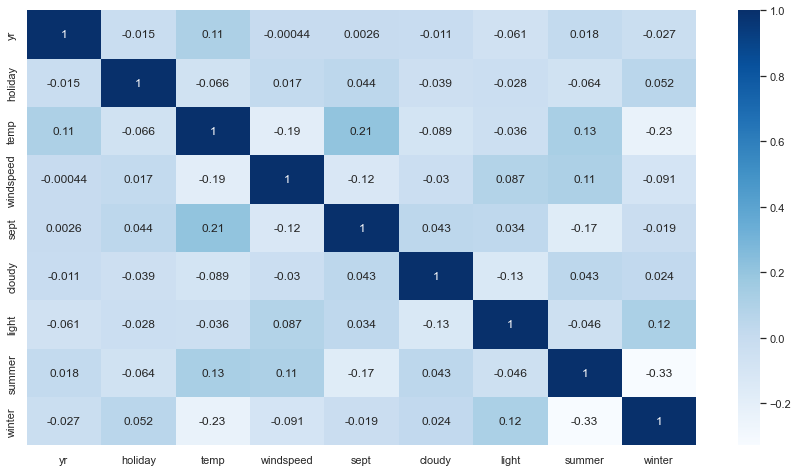

In [560]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="Blues")
plt.show()

### Final model inference
- Here all VIF of all columns are below 5
- p values for all columns are 0.0
- r2 score is 0.83
- r2 and adj. r2 have very less difference which means no additional columns can be removed from model

#### We will select model 7 as it has high r2 score no insignificant variables and no multi - correlation

### Linear Regression assumption and Residual analysis

In [561]:
lr_7.params

const        0.125926
yr           0.232861
holiday     -0.098685
temp         0.548008
windspeed   -0.153246
sept         0.101195
cloudy      -0.078375
light       -0.282869
summer       0.088080
winter       0.129345
dtype: float64

In [562]:
X_train_lm_7

,const,yr,holiday,temp,windspeed,sept,cloudy,light,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,1,0


In [563]:
y_train_pred = lr_7.predict(X_train_lm_7)

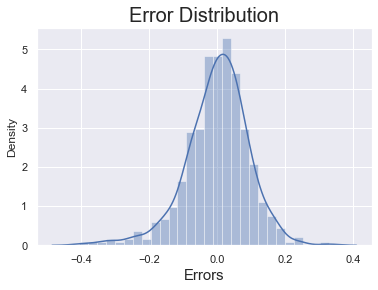

In [564]:
# Plot the histogram to check distribution of error terms

sns.distplot(y_train - y_train_pred)
plt.xlabel('Errors', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 20})
plt.show()

#### Linearity Check

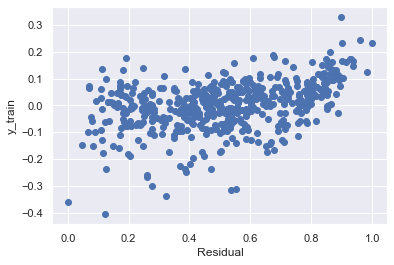

In [565]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Homoscedasticity

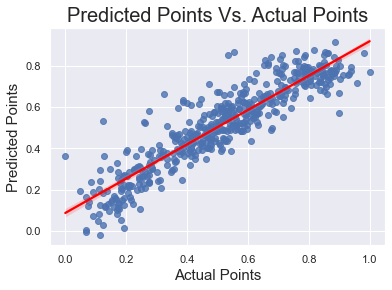

In [566]:
sns.set_theme(color_codes=True)
sns.regplot(x=y_train, y=y_train_pred,line_kws={"color": "red"})
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

### Making Predictions Using the Final Model

In [567]:
# Applying scaling on the test dataset

df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,cloudy,light,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [568]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,cloudy,light,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.163248,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [569]:
# fixing target variable
y_test = df_test.pop('cnt')

In [570]:
#fixing columns according to our last model
X_test = df_test
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [571]:
col1 = X_train_rfe.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [572]:
y_pred = lr_7.predict(X_test_new)

In [573]:
# r2 score of the test data
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7942

### Conclusion

#### Significant Variables
- const      
- yr           
- holiday     
- temp        
- windspeed  
- sept        
- cloudy    
- light      
- summer     
- winter    


#### The company should focus around this variables to improve the business and plan when to increase bikes to match demand and when to store and service the bike so that business is least impacted.